Bank Account Fraud Dataset Suite (NeurIPS 2022)-linear SVM

In [1]:
# imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
# build custom preprocessor function - wrapper around column transformer
class Preprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, cat_features, num_features):
        self.cat_features_ = cat_features
        self.num_features_ = num_features
        self.encoder_ = OneHotEncoder(sparse_output=False, drop='first')
        self.scaler_ = StandardScaler()
        self.imputer_ = SimpleImputer(strategy="mean")
    
    def fit(self, X, y=None):
        self.encoder_.fit(X[self.cat_features_])
        self.scaler_.fit(X[self.num_features_])
        self.imputer_.fit(X[self.num_features_])
        return self
    
    def transform(self, X):
        X_encoded = pd.DataFrame(self.encoder_.transform(X[self.cat_features_]),
                            columns=self.encoder_.get_feature_names_out(self.cat_features_), index=X.index)
        X_imputed = pd.DataFrame(self.imputer_.transform(X[self.num_features_]),
                                 columns=self.num_features_, index=X.index)
        X_scaled = pd.DataFrame(self.scaler_.transform(X_imputed[self.num_features_]),
                             columns=self.num_features_, index=X_imputed.index)
        X_combined = pd.concat([X_encoded, X_scaled], axis=1)
        return X_combined

In [3]:
df = pd.read_csv("Base.csv")

y = df["fraud_bool"]
X = df.drop(["fraud_bool"], axis=1)
X = X.replace(-1, np.nan)

X.head()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0.3,0.986506,NaN,25.0,40,0.006735,102.453711,AA,1059,13096.035018,...,0,1500.0,0,INTERNET,16.224843,linux,1,1.0,0,0
1,0.8,0.617426,NaN,89.0,20,0.010095,-0.849551,AD,1658,9223.283431,...,0,1500.0,0,INTERNET,3.363854,other,1,1.0,0,0
2,0.8,0.996707,9.0,14.0,40,0.012316,-1.490386,AB,1095,4471.472149,...,0,200.0,0,INTERNET,22.730559,windows,0,1.0,0,0
3,0.6,0.475100,11.0,14.0,30,0.006991,-1.863101,AB,3483,14431.993621,...,0,200.0,0,INTERNET,15.215816,linux,1,1.0,0,0
4,0.9,0.842307,NaN,29.0,40,5.742626,47.152498,AA,2339,7601.511579,...,0,200.0,0,INTERNET,3.743048,other,0,1.0,0,0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
# define get numeric cols
#numeric_features = X.select_dtypes(include=['number']).columns.tolist()
numeric_features = ["income", "name_email_similarity", "prev_address_months_count",
                    "current_address_months_count", "customer_age", "days_since_request",
                    "intended_balcon_amount", "zip_count_4w", "velocity_6h", "velocity_24h",
                    
                    "velocity_4w", "bank_branch_count_8w", "date_of_birth_distinct_emails_4w",
                    "credit_risk_score", "bank_months_count", "proposed_credit_limit",
                    "session_length_in_minutes", "device_distinct_emails_8w", "device_fraud_count", 
                    "month"]
#categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_features = ["payment_type", "employment_status", "housing_status", "source", "device_os",
                       "email_is_free", "phone_home_valid", "phone_mobile_valid", "has_other_cards",
                       "foreign_request", "keep_alive_session"]

In [6]:
pipeline = Pipeline(steps=[
    ('preprocessor', Preprocessor(categorical_features, numeric_features)),
])


In [7]:
X_train_processed = pipeline.fit_transform(X_train)
X_train_processed.head()

,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,...,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes,device_distinct_emails_8w,device_fraud_count,month
570606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.181324,-0.399231,-0.894539,-1.494541,0.000000,2.016399,0.423707,-0.107872,0.0,0.321879
756283,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.456177,-0.388355,1.092164,-1.150035,-0.509289,-0.648666,0.174233,-0.107872,0.0,0.774403
738227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.374982,3.259512,-1.291880,0.055734,0.878568,-0.033651,-0.104132,-0.107872,0.0,0.774403
554038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.374719,-0.397056,0.694824,-0.317480,1.138791,-0.033651,-0.204781,-0.107872,0.0,0.321879
712266,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.765597,0.116299,-0.894539,1.189732,-1.203218,0.991374,-0.316836,-0.107872,0.0,0.774403


In [8]:
X_test_processed = pipeline.transform(X_test)
X_test_processed.head()

,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,...,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes,device_distinct_emails_8w,device_fraud_count,month
987231,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-1.952390,-0.381829,-1.490550,0.586847,1.138791,-0.033651,1.001290,-0.107872,0.0,1.679451
79954,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.104457,1.134308,-0.099858,-0.044747,0.618345,-0.648666,-0.205522,-0.107872,0.0,-1.488217
567130,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.124291,-0.370953,1.290835,-1.781629,0.878568,-0.648666,-0.352212,-0.107872,0.0,0.321879
500891,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.026844,-0.399231,0.694824,-0.504087,0.000000,-0.648666,0.080462,-0.107872,0.0,-0.130645
55399,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.652033,-0.373128,-0.497199,-0.661986,-1.203218,-0.648666,-0.302617,-0.107872,0.0,-1.488217


In [9]:
X_train_processed.shape

(750000, 47)

In [10]:
X_test_processed.shape

(250000, 47)

In [11]:
X_train_processed.sort_index(inplace=True)
y_train.sort_index(inplace=True)
X_test_processed.sort_index(inplace=True)
y_test.sort_index(inplace=True)
X_train_processed.head(10)

,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,...,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes,device_distinct_emails_8w,device_fraud_count,month
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.179821,-0.394881,1.688175,0.328468,-1.116477,2.016399,-0.522561,-0.107872,0.0,-1.488217
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.235139,-0.368778,0.297483,-0.604568,1.312273,-0.648666,1.887050,-0.107872,0.0,-1.488217
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.210988,-0.377479,0.694824,-0.590214,-1.203218,-0.648666,0.952063,-0.107872,0.0,-1.488217
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.178809,-0.399231,-0.695869,-0.575859,0.965309,-0.648666,-0.475382,-0.107872,0.0,-1.488217
5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.768171,1.132133,-0.894539,0.041380,1.312273,-0.648666,-0.071729,-0.107872,0.0,-1.488217
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.611507,-0.340500,-0.298528,-0.848593,-1.203218,-0.648666,2.567550,-0.107872,0.0,-1.488217
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.922562,-0.397056,0.098813,-1.379706,-1.116477,-0.648666,-0.278009,-0.107872,0.0,-1.488217
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.583462,-0.370953,2.085516,1.003125,0.011157,2.016399,-0.430476,-0.107872,0.0,-1.488217
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.669733,-0.397056,-0.695869,0.070089,0.011157,2.016399,3.153428,-0.107872,0.0,-1.488217
13,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.041811,-0.362252,-0.298528,-0.116519,1.312273,2.016399,1.622865,-0.107872,0.0,-1.488217


In [12]:
X_test_processed.head(10)

,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,...,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes,device_distinct_emails_8w,device_fraud_count,month
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.049874,-0.390530,-0.894539,0.457657,-0.509289,2.016399,1.077607,-0.107872,0.0,-1.488217
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.707154,-0.388355,-0.497199,0.457657,0.878568,-0.648666,0.456677,-0.107872,0.0,-1.488217
10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.575781,-0.377479,-0.099858,0.759100,-1.203218,2.016399,-0.581209,-0.107872,0.0,-1.488217
12,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.229113,1.103855,2.482857,-0.676340,1.312273,-0.648666,-0.418562,5.555988,0.0,-1.488217
14,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.096928,-0.340500,1.290835,-0.618923,-1.203218,-0.648666,-0.154253,-0.107872,0.0,-1.488217
17,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.011419,-0.399231,0.098813,0.084443,0.000000,-0.648666,-0.382903,-0.107872,0.0,-1.488217
18,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.602661,3.598848,1.688175,-1.178744,0.011157,-0.648666,-0.587964,5.555988,0.0,-1.488217
20,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.588095,-0.399231,0.694824,-0.963428,1.138791,-0.648666,-0.738588,-0.107872,0.0,-1.488217
24,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.124015,0.871105,0.694824,-0.748112,-1.203218,-0.648666,-0.590416,-0.107872,0.0,-1.488217
31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.067544,-0.381829,-1.490550,0.730391,1.052050,2.016399,-0.759684,-0.107872,0.0,-1.488217


In [13]:
X_test_processed.head(10)

,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,...,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes,device_distinct_emails_8w,device_fraud_count,month
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.049874,-0.390530,-0.894539,0.457657,-0.509289,2.016399,1.077607,-0.107872,0.0,-1.488217
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.707154,-0.388355,-0.497199,0.457657,0.878568,-0.648666,0.456677,-0.107872,0.0,-1.488217
10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.575781,-0.377479,-0.099858,0.759100,-1.203218,2.016399,-0.581209,-0.107872,0.0,-1.488217
12,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.229113,1.103855,2.482857,-0.676340,1.312273,-0.648666,-0.418562,5.555988,0.0,-1.488217
14,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.096928,-0.340500,1.290835,-0.618923,-1.203218,-0.648666,-0.154253,-0.107872,0.0,-1.488217
17,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.011419,-0.399231,0.098813,0.084443,0.000000,-0.648666,-0.382903,-0.107872,0.0,-1.488217
18,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.602661,3.598848,1.688175,-1.178744,0.011157,-0.648666,-0.587964,5.555988,0.0,-1.488217
20,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.588095,-0.399231,0.694824,-0.963428,1.138791,-0.648666,-0.738588,-0.107872,0.0,-1.488217
24,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.124015,0.871105,0.694824,-0.748112,-1.203218,-0.648666,-0.590416,-0.107872,0.0,-1.488217
31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.067544,-0.381829,-1.490550,0.730391,1.052050,2.016399,-0.759684,-0.107872,0.0,-1.488217


In [14]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)
X_train_resampled.shape

/Users/tracycui/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


(1483302, 47)

In [15]:
from sklearn.svm import LinearSVC

In [16]:
model = LinearSVC(random_state=42, max_iter=10000, class_weight='balanced')
model.fit(X_train_resampled, y_train_resampled)

LinearSVC(class_weight='balanced', max_iter=10000, random_state=42)

In [17]:
y_pred = model.predict(X_test_processed)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[204106  43214]
 [   688   1992]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.90    247320
           1       0.04      0.74      0.08      2680

    accuracy                           0.82    250000
   macro avg       0.52      0.78      0.49    250000
weighted avg       0.99      0.82      0.89    250000



In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

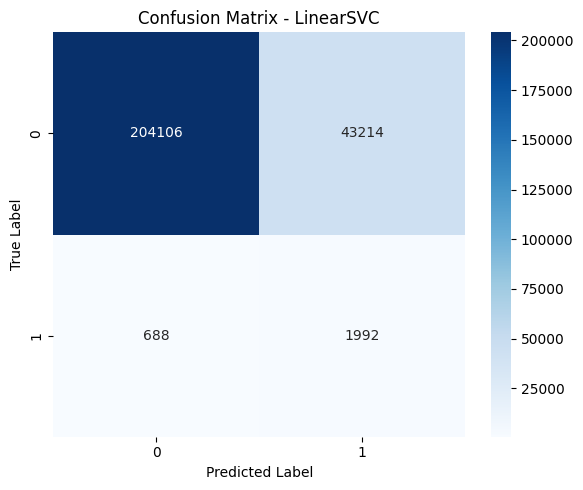

In [20]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - LinearSVC")
plt.tight_layout()
plt.show()

In [23]:
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

In [24]:
y_scores = model.decision_function(X_test_processed)

In [25]:
precision, recall, _ = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)

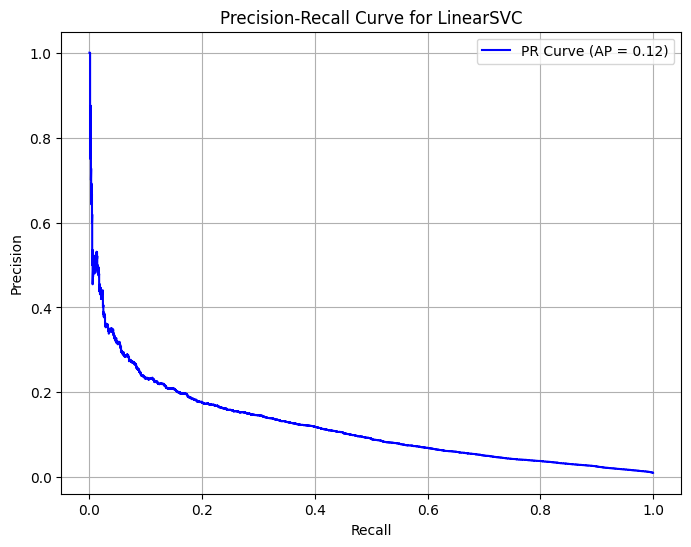

In [26]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AP = {average_precision:.2f})', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for LinearSVC')
plt.legend()
plt.grid(True)
plt.show()